 
                                BENSAID Mohamed  et JDAINI Yousra

                Master              :  SDSI FP-Nador                                       
                Module              :  Modélisation statistique et analyse de données     
                Année universitaire :  2020/2021                                          
          

                                           # Projet 
                                            
                                        
                            Mission 2 : réaliser la classification de données (ACP & KNN)

description  du Dataset choisi:
-----------------------

Il s'agit d'une identification du type d'une onde à travers un  ensemble de données de l'UCI. Il contient 21 attributs continue

Informations sur les attributs :
une class de trois valeur
21 valeurs calcule par d'experiance scientific

lien:
kaggle : https://www.kaggle.com/zwangm/waveform
UCI : http://archive.ics.uci.edu/ml/datasets/waveform+database+generator+(version+1)

                                  
                                  




                                    Statistique descriptive











import all libraries we need 
pandas : 
matplotlib : 
numpy : 
sklearn : 

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import decomposition,preprocessing


import the data
and show the data s shape

In [3]:

data = pd.read_csv('waveform.csv')
data.head()
data.shape


(5000, 22)

Separation de "Target" est des "Feature"

In [4]:
features=data.drop(["class"],axis =1)
target=data["class"]
print(target.value_counts())

2    1696
0    1657
1    1647
Name: class, dtype: int64


Etude statistique

In [5]:
features.describe()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,3.013614,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.512448,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-1.690000,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.920000,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,3.000000,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,4.082500,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.400000,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000


Les histogramme des features

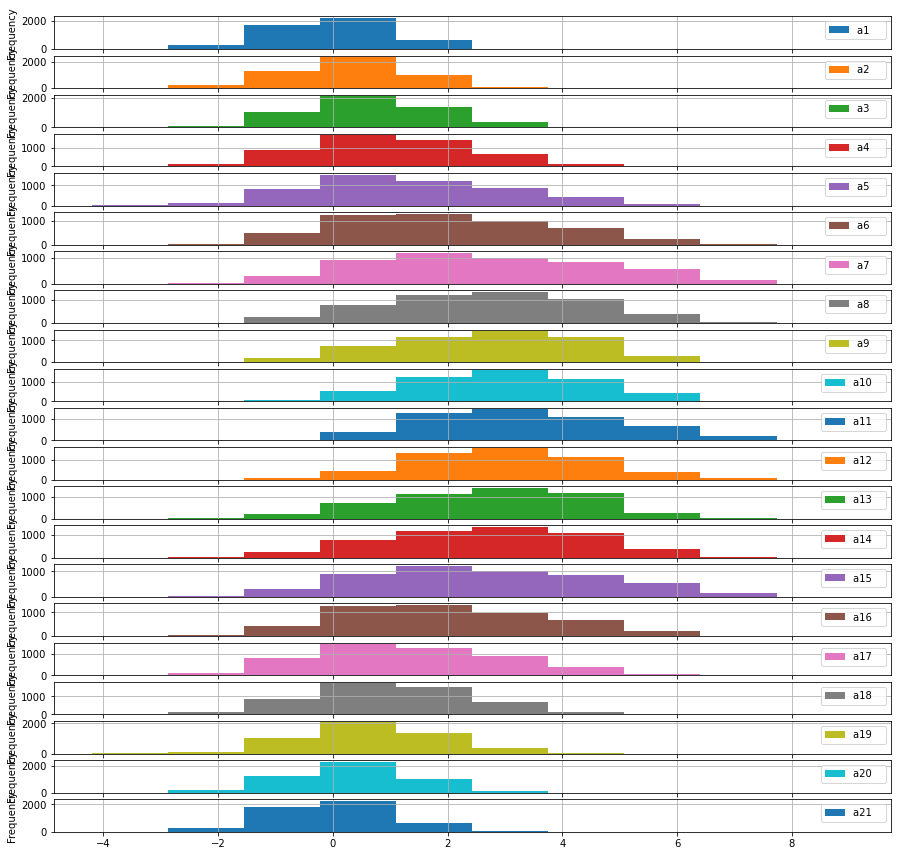

In [6]:
features.plot.hist( subplots = True, grid = True,figsize=(15, 15));


Effictives de chaque classe

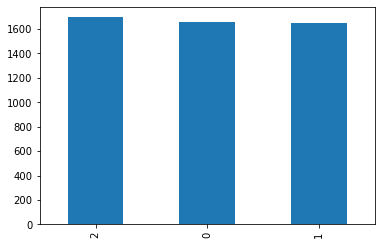

In [7]:
ay =target.value_counts().plot(kind='bar')

le data set équilibré en terme de distrubution d'effictive dans chaque classe

Les boites a moustache

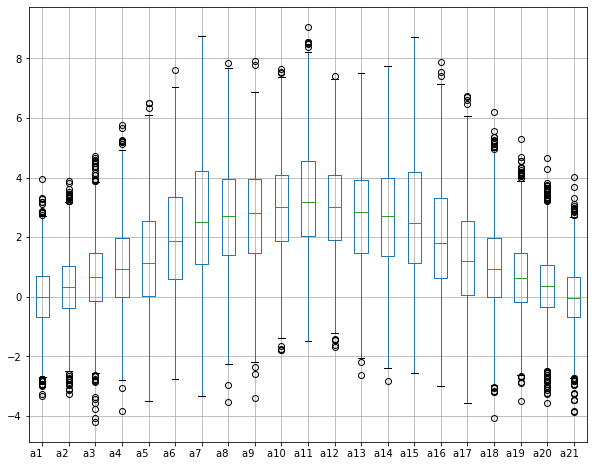

In [8]:
features.boxplot(figsize=(10, 8));

tous les features on presque les mêmes grandeurs donc on peut travailler ur le dataset sans centrer et réduire les données

certain variable present plusieur valeur atypique


                                                        PCA     


Etude de correlation

In [9]:
features.corr()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
a1,1.000000,0.003445,-0.012182,-0.008974,-0.010520,0.003936,-0.009380,-0.003983,0.014483,0.025222,...,0.007920,0.008378,0.001972,-0.003349,-0.015558,0.006227,-0.002217,0.012442,-0.002307,-0.020289
a2,0.003445,1.000000,0.168465,0.213244,0.260190,0.271216,0.258219,0.212376,0.134737,-0.004828,...,-0.207686,-0.258503,-0.231772,-0.201157,-0.172230,-0.121178,-0.092741,-0.084480,-0.054827,0.000210
a3,-0.012182,0.168465,1.000000,0.372892,0.430006,0.440335,0.440655,0.355403,0.209571,-0.003468,...,-0.357164,-0.420435,-0.409020,-0.355659,-0.288715,-0.219605,-0.194988,-0.139315,-0.086013,-0.007345
a4,-0.008974,0.213244,0.372892,1.000000,0.558078,0.570066,0.565426,0.430403,0.260621,-0.004680,...,-0.456966,-0.554221,-0.516901,-0.458710,-0.370855,-0.271240,-0.245196,-0.173423,-0.110116,-0.017835
a5,-0.010520,0.260190,0.430006,0.558078,1.000000,0.655717,0.655947,0.529678,0.300970,0.002807,...,-0.527066,-0.645430,-0.608000,-0.527708,-0.439613,-0.320260,-0.279496,-0.215631,-0.127605,-0.016286
a6,0.003936,0.271216,0.440335,0.570066,0.655717,1.000000,0.715144,0.609012,0.426313,0.134934,...,-0.485205,-0.650546,-0.657164,-0.626614,-0.541029,-0.434345,-0.390972,-0.291995,-0.181792,-0.007209
a7,-0.009380,0.258219,0.440655,0.565426,0.655947,0.715144,1.000000,0.681378,0.520954,0.222589,...,-0.419717,-0.650875,-0.708440,-0.703506,-0.617943,-0.526650,-0.460166,-0.358755,-0.217649,-0.008078
a8,-0.003983,0.212376,0.355403,0.430403,0.529678,0.609012,0.681378,1.000000,0.597548,0.379615,...,-0.241541,-0.525896,-0.647556,-0.709068,-0.668155,-0.604254,-0.526140,-0.410641,-0.244538,-0.017221
a9,0.014483,0.134737,0.209571,0.260621,0.300970,0.426313,0.520954,0.597548,1.000000,0.530550,...,0.013138,-0.309384,-0.508011,-0.653311,-0.654575,-0.641575,-0.561005,-0.429375,-0.265949,0.004441
a10,0.025222,-0.004828,-0.003468,-0.004680,0.002807,0.134934,0.222589,0.379615,0.530550,1.000000,...,0.279694,-0.001459,-0.258667,-0.441610,-0.487913,-0.533508,-0.474153,-0.366523,-0.195432,0.024662


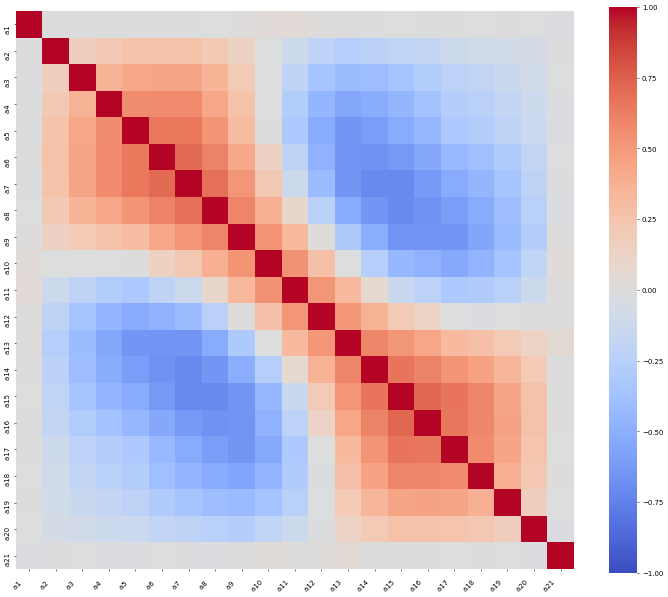

In [10]:
corr =features.corr()
plt.subplots(figsize=(18,15),dpi=50)
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap='coolwarm',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

il y a des combinaison de features qui presente une relation de correlation mais pas tellement forte

Visualisation des donnes-en deux dimensions

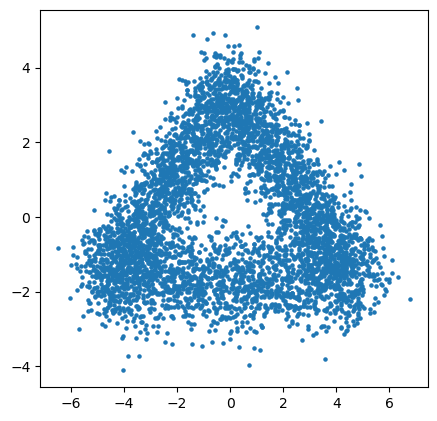

In [11]:
#centrer reduire les données
Xx = preprocessing.StandardScaler(with_std=True).fit_transform(features)
#cpa components
model = decomposition.PCA(n_components=2)
#on recupere les new individus
new_X = model.fit_transform(Xx)
x = pd.DataFrame(new_X)
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(new_X[:,0],new_X[:,1],s=5);

Nos données sont de dimension 21 on applique acp de deux composante et on visualise les resultats obtenue

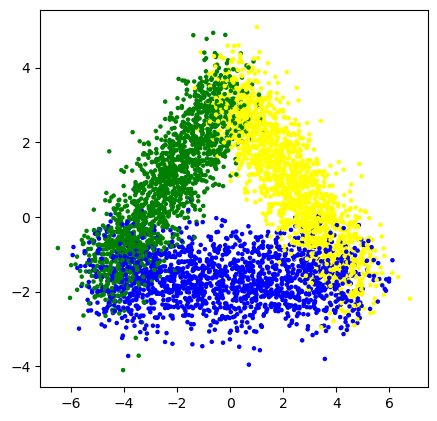

In [12]:

colors = {0:'blue', 1:'green', 2:'yellow'}
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(new_X[:,0],new_X[:,1],c=target.map(colors),s=5);

apres on color nos point par sa classe on peut remarque que les points chaque class sont separer par des cluster de chaque class

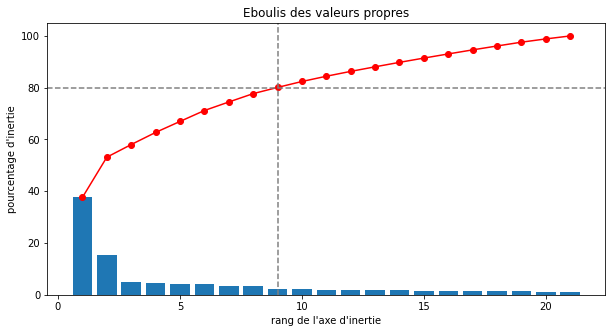

In [13]:

def display_scree_plot(pca,p):
    scree = pca.explained_variance_ratio_*100
    plt.figure(figsize=(10, 5))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    t=0
    for i in range(len(scree)):
        if (t>p):
            break
        n=i
        t=t+scree[i]
    plt.axhline(y=p,color='grey',ls='--')
    plt.axvline(x=n+1,color='grey',ls='--')

    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    plt.show()
pca = decomposition.PCA(n_components= 21)
pca.fit(Xx)

display_scree_plot(pca,80)

On remarque seulment 8 de 21 on ete suffisante pour explique la variance dans les donnes les autre composante n'ont pas de valeur donc puisque il vont augmenter la complexite dans le modele de classification

In [14]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())

[0.37638607 0.15528644 0.04874315 0.04686319 0.04244344 0.04217687
 0.03290915 0.03229377 0.02405363 0.02285915 0.02029511 0.01879966
 0.01763547 0.01721044 0.01653025 0.01598819 0.01569611 0.0150269
 0.01471662 0.01257773 0.01150868]
0.9999999999999997


On remaque que les deux premier composantes decrits la majorite de la variance

In [15]:
model = decomposition.PCA(n_components=0.8)
new_X = model.fit_transform(Xx)
x = pd.DataFrame(new_X)

In [16]:
print (model.explained_variance_ratio_)
print (model.explained_variance_ratio_.sum())

[0.37638607 0.15528644 0.04874315 0.04686319 0.04244344 0.04217687
 0.03290915 0.03229377 0.02405363]
0.8011556962991303


In [ ]:

df = pd.DataFrame(model.components_, columns=list(features.columns))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21
0,0.000449,-0.106731,-0.176947,-0.219943,-0.251650,-0.283571,-0.304933,-0.294585,-0.250102,-0.144226,-0.006192,0.135219,0.249441,0.292662,0.306844,0.285052,0.254126,0.227418,0.179163,0.109737,0.004865
1,0.017076,-0.117770,-0.180032,-0.222381,-0.238629,-0.159433,-0.092685,0.053273,0.234498,0.387240,0.464472,0.392103,0.235766,0.060764,-0.090086,-0.154086,-0.228256,-0.214963,-0.184219,-0.109725,0.018365
2,0.688065,-0.003005,-0.023384,0.002633,-0.002238,0.001952,-0.009243,0.007564,0.006637,0.004488,0.026225,0.001952,-0.036198,0.003240,-0.002236,-0.018341,0.010396,-0.013457,0.032837,0.086003,-0.717406
3,0.714421,0.136303,-0.002767,-0.003407,0.002215,0.023576,-0.000336,-0.018002,0.008911,0.018188,-0.001017,-0.022142,0.030942,-0.004303,0.003453,-0.001257,0.025022,0.033623,0.053957,-0.104261,0.672823
4,0.087640,-0.730753,0.095372,0.061247,0.036440,0.023204,0.032196,0.020954,-0.003585,0.047899,-0.001843,-0.054615,-0.024566,-0.055005,-0.038522,-0.023678,-0.037977,-0.055438,-0.053278,0.631171,0.159472
5,-0.046170,0.641243,-0.062029,-0.054012,-0.019696,-0.011153,-0.013485,0.015023,0.034446,0.079792,0.078133,0.036094,0.019550,0.004741,-0.004538,-0.015686,-0.034679,-0.002965,-0.105588,0.741103,0.042006
6,0.008010,-0.074517,-0.908174,0.141811,0.097897,0.062420,0.047976,0.011543,-0.033158,-0.053850,-0.098403,-0.112831,-0.106210,-0.034009,-0.009153,-0.011088,0.020885,0.059992,-0.299682,-0.013330,0.022317
7,0.059817,-0.001950,0.300918,-0.082282,-0.019021,-0.038824,-0.033467,-0.055783,-0.102527,-0.117106,-0.013714,-0.042502,0.036019,0.058299,0.072070,0.075157,0.074652,0.163518,-0.901503,-0.078005,-0.011534
8,0.008406,0.053937,0.059948,0.855567,-0.133363,-0.065688,-0.071243,-0.192449,-0.065318,-0.037974,0.036054,0.237980,0.122606,0.111546,0.016732,0.060022,0.064533,-0.305490,-0.068548,0.000173,0.005552


                                                KNN

from sklearn import metrics
from sklearn import model_selection

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import model_selection

In [19]:
y=target.to_numpy()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2,random_state=356)

On divisé les donnes : 20% de test , 80% d'entrainment 

In [20]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(x_train, y_train)
acc = Knn_model.score(x_test, y_test)
print(acc)

0.833


On applique l'algorithme de classifaction K-NN de parametre 5

In [ ]:
errors = []
max = 0
best_k=0
for k in range(2,22):
    knn = KNeighborsClassifier(n_neighbors=k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
    if max < knn.score(x_test, y_test):
        max =knn.score(x_test, y_test)
        best_k = k
plt.plot(range(2,22), errors, 'o-')
plt.show()

On applique une recherche sur plusieur parametres on prend le k qui correspont au plus bas ereur

In [ ]:
print(best_k)
Knn_model = KNeighborsClassifier(n_neighbors=best_k)
Knn_model.fit(x_train, y_train)
acc = Knn_model.score(x_test, y_test)

On predis le valeur de test et on calcule l'accuracy

In [ ]:
y_pred = Knn_model.predict(x_test)
print ("\nSur le jeu de test : %0.3f" % metrics.accuracy_score(y_test, y_pred))

On applique une recherche par validation croisee 

In [ ]:
#Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[ 3, 5, 7, 9, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21]}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'
clf = model_selection.GridSearchCV(KNeighborsClassifier(),# un classifieur kNN
param_grid, # hyperparamètres à tester
cv=6, # nombre de folds de validation croisée
scoring=score # score à optimiser
)
clf.fit(x_train, y_train)

In [ ]:
# Afficher les performances correspondantes
print ("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'],clf.cv_results_['std_test_score'],clf.cv_results_['params']):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score,mean,std * 2,params))

In [ ]:
print ("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",clf.best_params_)

In [ ]:
y_pred = clf.predict(x_test)
print ("\nSur le jeu de test : %0.3f" % metrics.accuracy_score(y_test, y_pred))

Apres Selction de meilleur K par la methode de validation croise on obtenue une accuracy plus bas mais main avec un plus petit hyperparametre
cad le 1er modele est plus exact et le deuxieme plus rapide

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
# raport de classification
print(classification_report(y_test, y_pred, \
target_names = ['0', '1', '2']))